In [ ]:
import numpy as np
# Let's break down exactly what happens
print("How Matrix Multiplication Works:")
print("=" * 50)

A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[7, 8],
              [9, 10],
              [11, 12]])

print("A @ B element by element:")
print()

# Calculate each element
for i in range(2):
    for j in range(2):
        row = A[i, :]
        col = B[:, j]
        dot = np.dot(row, col)

        calc = " + ".join([f"{r}*{c}" for r, c in zip(row, col)])
        print(f"C[{i},{j}] = Row {i} of A . Col {j} of B")
        print(f"       = {row} . {col}")
        print(f"       = {calc}")
        print(f"       = {dot}")
        print()

How Matrix Multiplication Works:
A @ B element by element:

C[0,0] = Row 0 of A . Col 0 of B
       = [1 2 3] . [ 7  9 11]
       = 1*7 + 2*9 + 3*11
       = 58

C[0,1] = Row 0 of A . Col 1 of B
       = [1 2 3] . [ 8 10 12]
       = 1*8 + 2*10 + 3*12
       = 64

C[1,0] = Row 1 of A . Col 0 of B
       = [4 5 6] . [ 7  9 11]
       = 4*7 + 5*9 + 6*11
       = 139

C[1,1] = Row 1 of A . Col 1 of B
       = [4 5 6] . [ 8 10 12]
       = 4*8 + 5*10 + 6*12
       = 154



In [ ]:
# Matrix multiplication basics
A = np.array([[1, 2, 3],
              [4, 5, 6]])  # Shape: (2, 3)

B = np.array([[7, 8],
              [9, 10],
              [11, 12]])  # Shape: (3, 2)

print("Matrix A (2x3):")
print(A)
print()
print("Matrix B (3x2):")
print(B)
print()

# Matrix multiplication
C = A @ B  # or np.matmul(A, B) or np.dot(A, B)
print("C = A @ B (2x2):")
print(C)
print()
print(f"Shape: {A.shape} @ {B.shape} = {C.shape}")
print("  (2, 3) @ (3, 2) -> inner dims match (3=3) -> output (2, 2)")

Matrix A (2x3):
[[1 2 3]
 [4 5 6]]

Matrix B (3x2):
[[ 7  8]
 [ 9 10]
 [11 12]]

C = A @ B (2x2):
[[ 58  64]
 [139 154]]

Shape: (2, 3) @ (3, 2) = (2, 2)
  (2, 3) @ (3, 2) -> inner dims match (3=3) -> output (2, 2)


## 5.1 Understanding Matrix Multiplication

For matrices A (m x n) and B (n x p):
- A @ B produces a matrix of shape (m x p)
- The **inner dimensions must match** (n = n)
- Each element is the **dot product** of a row from A and a column from B

---

# Section 5: Matrix Multiplication

## The Heart of Neural Networks

**Matrix multiplication (matmul)** is the most important operation in deep learning!

Every layer in a neural network performs: **output = input @ weights**

This is NOT element-wise multiplication - it's a specific mathematical operation that combines entire rows with entire columns.

In [ ]:
# Simulating a neural network layer with bias addition
print("Neural Network Layer: z = Wx + b")
print("=" * 50)

# Batch of 4 samples, each with 3 features
batch_size = 4
input_features = 3
output_features = 2

X = np.random.randn(batch_size, input_features)  # (4, 3)
W = np.random.randn(input_features, output_features)  # (3, 2)
b = np.array([0.5, -0.5])  # (2,) - one bias per output neuron

print(f"Input X shape: {X.shape}     <- (batch_size, input_features)")
print(f"Weights W shape: {W.shape}   <- (input_features, output_features)")
print(f"Bias b shape: {b.shape}         <- (output_features,)")
print()

# Forward pass
z = X @ W  # Matrix multiplication: (4, 3) @ (3, 2) = (4, 2)
print(f"X @ W shape: {z.shape}        <- (batch_size, output_features)")

# Add bias using broadcasting!
z = z + b  # Broadcasting: (4, 2) + (2,) = (4, 2)
print(f"z + b shape: {z.shape}        <- Same! Bias was broadcast across batch")
print()
print("Result (z = Wx + b):")
print(z)

Neural Network Layer: z = Wx + b
Input X shape: (4, 3)     <- (batch_size, input_features)
Weights W shape: (3, 2)   <- (input_features, output_features)
Bias b shape: (2,)         <- (output_features,)

X @ W shape: (4, 2)        <- (batch_size, output_features)
z + b shape: (4, 2)        <- Same! Bias was broadcast across batch

Result (z = Wx + b):
[[ 1.8734053   0.00220525]
 [-0.1914786  -0.16512301]
 [ 2.14657613  1.81104149]
 [ 2.14518672  1.37482846]]


### Deep Learning Connection: Bias Addition in Neural Networks

In a neural network layer, the forward pass is: **z = Wx + b**

Here, `b` is a bias vector that gets broadcast across all samples in a batch!

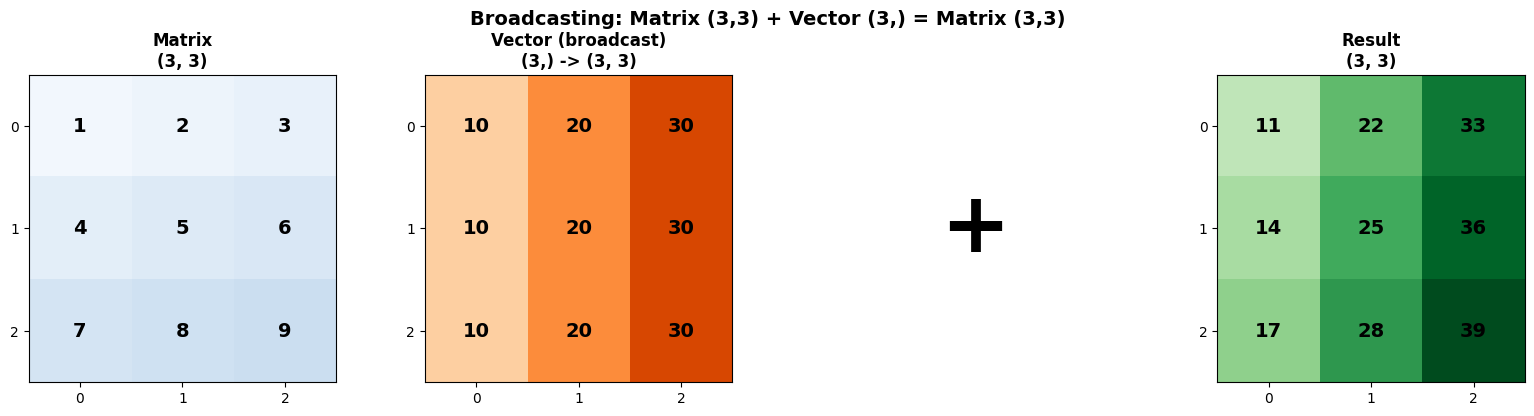

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize broadcasting
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
vector = np.array([10, 20, 30])
result = matrix + vector

# Original matrix
ax = axes[0]
im = ax.imshow(matrix, cmap='Blues', vmin=0, vmax=40)
ax.set_title('Matrix\n(3, 3)', fontsize=12, fontweight='bold')
for i in range(3):
    for j in range(3):
        ax.text(j, i, matrix[i, j], ha='center', va='center', fontsize=14, fontweight='bold')
ax.set_xticks(range(3))
ax.set_yticks(range(3))

# Vector (shown as it will be broadcast)
ax = axes[1]
broadcast_viz = np.tile(vector, (3, 1))
im = ax.imshow(broadcast_viz, cmap='Oranges', vmin=0, vmax=40)
ax.set_title('Vector (broadcast)\n(3,) -> (3, 3)', fontsize=12, fontweight='bold')
for i in range(3):
    for j in range(3):
        ax.text(j, i, broadcast_viz[i, j], ha='center', va='center', fontsize=14, fontweight='bold')
ax.set_xticks(range(3))
ax.set_yticks(range(3))

# Plus sign
ax = axes[2]
ax.axis('off')
ax.text(0.5, 0.5, '+', fontsize=60, ha='center', va='center', fontweight='bold')

# Result
ax = axes[3]
im = ax.imshow(result, cmap='Greens', vmin=0, vmax=40)
ax.set_title('Result\n(3, 3)', fontsize=12, fontweight='bold')
for i in range(3):
    for j in range(3):
        ax.text(j, i, result[i, j], ha='center', va='center', fontsize=14, fontweight='bold')
ax.set_xticks(range(3))
ax.set_yticks(range(3))

plt.suptitle('Broadcasting: Matrix (3,3) + Vector (3,) = Matrix (3,3)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Matrix + Vector (most common in deep learning!)
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
row_vector = np.array([10, 20, 30])

print("Matrix (3x3):")
print(matrix)
print(f"Shape: {matrix.shape}")
print()
print("Row vector:", row_vector)
print(f"Shape: {row_vector.shape}")
print()

result = matrix + row_vector
print("Matrix + Row Vector:")
print(result)
print()
print("The vector was broadcast across all rows!")

In [ ]:
# Scalar + Array (simplest broadcasting)
arr = np.array([1, 2, 3, 4, 5])
scalar = 10

result = arr + scalar  # 10 is "broadcast" to [10, 10, 10, 10, 10]
print("Array + Scalar:")
print(f"  {arr}")
print(f"+ {scalar}")
print(f"= {result}")
print()
print("What happened: scalar 10 was 'stretched' to match the array shape!")

## 4.1 Broadcasting Basics

### The Rules
1. Arrays are compared from **right to left**
2. Dimensions are compatible if they're **equal** OR one of them is **1**
3. If an array has fewer dimensions, it's padded with 1s on the **left**

---

# Section 4: Broadcasting

## The Magic That Makes Neural Networks Work

**Broadcasting** allows NumPy to perform operations on arrays of different shapes. This is essential for:
- Adding biases to layer outputs (adding a vector to a matrix)
- Normalizing data (subtracting mean, dividing by std)
- Applying operations across batches

Without broadcasting, we'd need lots of explicit loops!

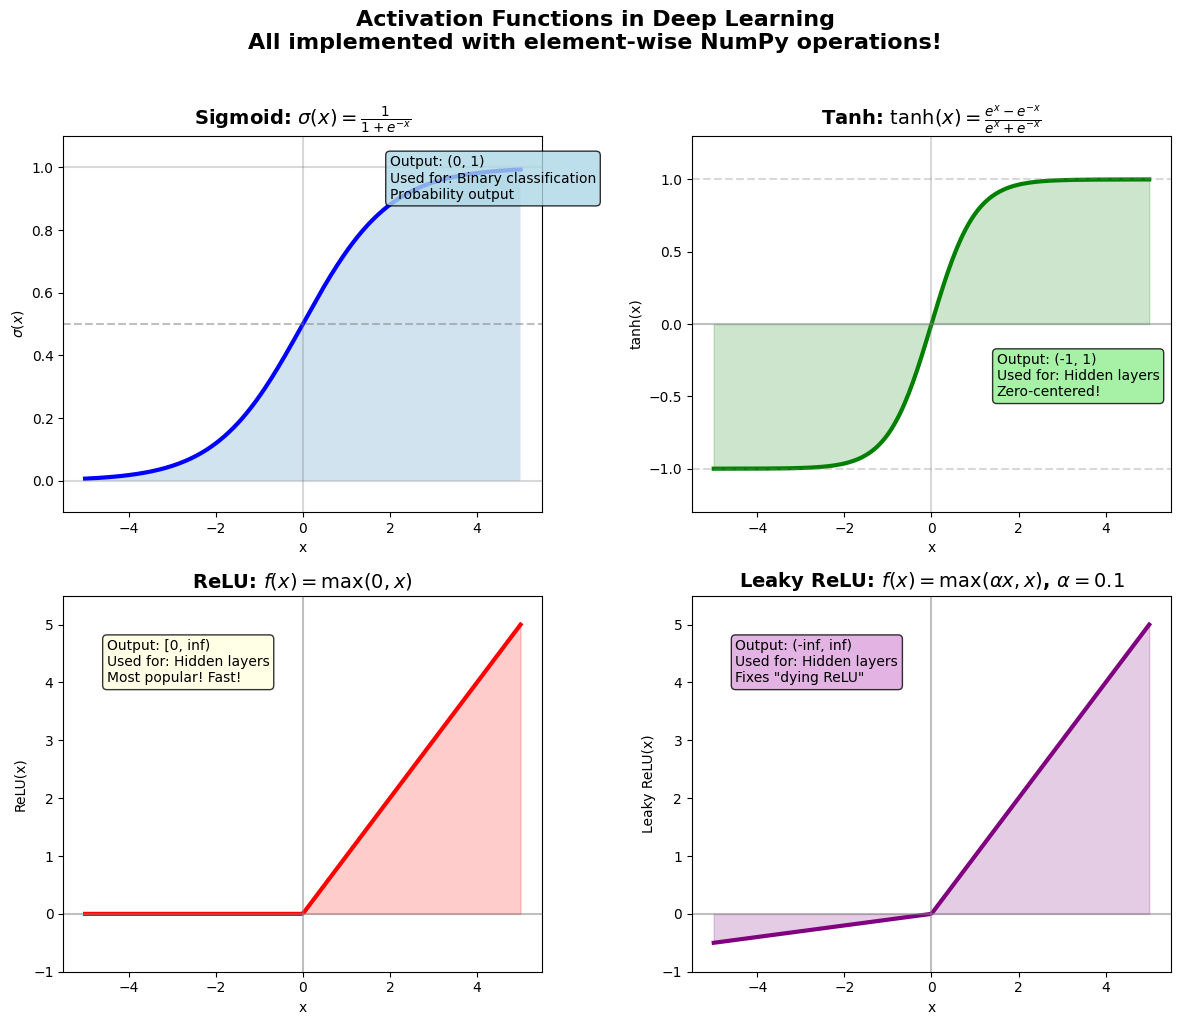

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure activation functions are defined if this cell is run independently
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Beautiful visualization of activation functions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

x = np.linspace(-5, 5, 200)

# Sigmoid
ax = axes[0, 0]
ax.plot(x, sigmoid(x), 'b-', linewidth=3, label='Sigmoid')
ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
ax.axhline(y=1, color='gray', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
ax.fill_between(x, 0, sigmoid(x), alpha=0.2)
ax.set_title('Sigmoid: ' + r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', fontsize=14, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel(r'$\sigma(x)$')
ax.set_ylim(-0.1, 1.1)
ax.annotate('Output: (0, 1)\nUsed for: Binary classification\nProbability output',
            xy=(2, 0.9), fontsize=10,
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Tanh
ax = axes[0, 1]
ax.plot(x, tanh(x), 'g-', linewidth=3, label='Tanh')
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
ax.axhline(y=-1, color='gray', linestyle='--', alpha=0.3)
ax.axhline(y=1, color='gray', linestyle='--', alpha=0.3)
ax.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
ax.fill_between(x, 0, tanh(x), alpha=0.2, color='green')
ax.set_title('Tanh: ' + r'$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$', fontsize=14, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('tanh(x)')
ax.set_ylim(-1.3, 1.3)
ax.annotate('Output: (-1, 1)\nUsed for: Hidden layers\nZero-centered!',
            xy=(1.5, -0.5), fontsize=10,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# ReLU
ax = axes[1, 0]
ax.plot(x, relu(x), 'r-', linewidth=3, label='ReLU')
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='-', alpha=0.5)
ax.fill_between(x[x >= 0], 0, relu(x[x >= 0]), alpha=0.2, color='red')
ax.set_title('ReLU: ' + r'$f(x) = \max(0, x)$', fontsize=14, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('ReLU(x)')
ax.set_ylim(-1, 5.5)
ax.annotate('Output: [0, inf)\nUsed for: Hidden layers\nMost popular! Fast!',
            xy=(-4.5, 4), fontsize=10,
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# Leaky ReLU
ax = axes[1, 1]
ax.plot(x, leaky_relu(x, 0.1), 'purple', linewidth=3, label='Leaky ReLU')
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='-', alpha=0.5)
ax.fill_between(x, 0, leaky_relu(x, 0.1), alpha=0.2, color='purple')
ax.set_title(f'Leaky ReLU: ' + r'$f(x) = \max(\alpha x, x)$, $\alpha=0.1$', fontsize=14, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('Leaky ReLU(x)')
ax.set_ylim(-1, 5.5)
ax.annotate('Output: (-inf, inf)\nUsed for: Hidden layers\nFixes "dying ReLU"',
            xy=(-4.5, 4), fontsize=10,
            bbox=dict(boxstyle='round', facecolor='plum', alpha=0.8))

plt.suptitle('Activation Functions in Deep Learning\nAll implemented with element-wise NumPy operations!',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
# Implementing activation functions with NumPy!

def sigmoid(x):
    """Squashes values to (0, 1) - used for binary classification"""
    return 1 / (1 + np.exp(-x))

def tanh(x):
    """Squashes values to (-1, 1) - zero-centered"""
    return np.tanh(x)

def relu(x):
    """max(0, x) - most popular activation for hidden layers"""
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    """Allows small negative gradients"""
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    """Converts to probability distribution - used for classification"""
    exp_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return exp_x / np.sum(exp_x)

# Test them
x = np.array([-2, -1, 0, 1, 2])
print("Input x:", x)
print()
print(f"sigmoid(x):    {sigmoid(x)}")
print(f"tanh(x):       {tanh(x)}")
print(f"relu(x):       {relu(x)}")
print(f"leaky_relu(x): {leaky_relu(x)}")
print(f"softmax(x):    {softmax(x)}  (sums to {softmax(x).sum():.2f})")

### Deep Learning Connection: Activation Functions

Activation functions are just element-wise operations! Let's implement the most common ones:

In [ ]:
import numpy as np
# Essential math functions for deep learning
x = np.array([-2, -1, 0, 1, 2])
print("x =", x)
print()

# Exponential and logarithm
print(f"np.exp(x)  = {np.exp(x)}")
print("  -> Used in: Softmax, Sigmoid")
print()

print(f"np.log(np.abs(x) + 1) = {np.log(np.abs(x) + 1)}")
print("  -> Used in: Cross-entropy loss")
print()

# Trigonometric (for positional encoding in Transformers!)
print(f"np.sin(x) = {np.sin(x)}")
print(f"np.cos(x) = {np.cos(x)}")
print("  -> Used in: Positional encoding (Transformers)")

x = [-2 -1  0  1  2]

np.exp(x)  = [0.13533528 0.36787944 1.         2.71828183 7.3890561 ]
  -> Used in: Softmax, Sigmoid

np.log(np.abs(x) + 1) = [1.09861229 0.69314718 0.         0.69314718 1.09861229]
  -> Used in: Cross-entropy loss

np.sin(x) = [-0.90929743 -0.84147098  0.          0.84147098  0.90929743]
np.cos(x) = [-0.41614684  0.54030231  1.          0.54030231 -0.41614684]
  -> Used in: Positional encoding (Transformers)


## 3.2 Mathematical Functions

NumPy provides many mathematical functions that operate element-wise - these are the building blocks of activation functions!

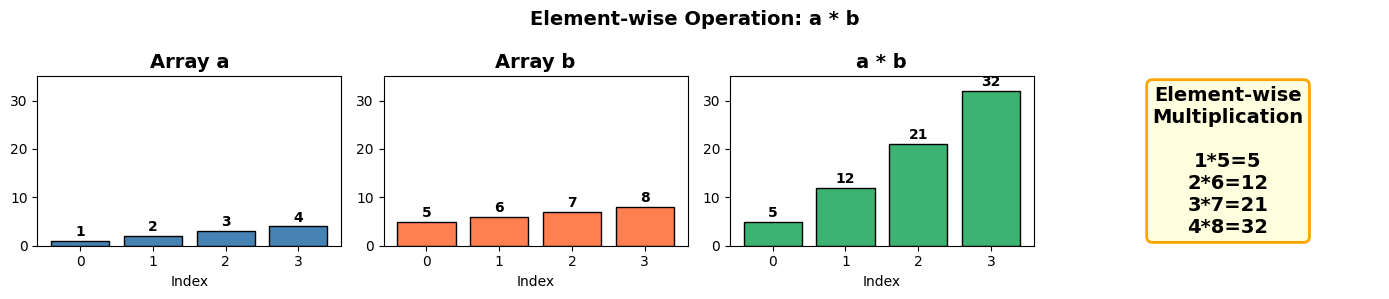

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize element-wise multiplication
fig, axes = plt.subplots(1, 4, figsize=(14, 3))

a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
result = a * b

colors = ['steelblue', 'coral', 'mediumseagreen']
labels = ['Array a', 'Array b', 'a * b']
data_arrays = [a, b, result]

for idx, (ax, arr, color, label) in enumerate(zip(axes[:3], data_arrays, colors, labels)):
    ax.bar(range(len(arr)), arr, color=color, edgecolor='black')
    ax.set_title(label, fontsize=14, fontweight='bold')
    ax.set_ylim(0, 35)
    for i, v in enumerate(arr):
        ax.text(i, v + 1, str(v), ha='center', fontweight='bold')
    ax.set_xticks(range(4))
    ax.set_xlabel('Index')

# Show the operation
axes[3].axis('off')
axes[3].text(0.5, 0.5, 'Element-wise\nMultiplication\n\n1*5=5\n2*6=12\n3*7=21\n4*8=32',
             ha='center', va='center', fontsize=14, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='orange', linewidth=2))

plt.suptitle('Element-wise Operation: a * b', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
# Operations between two arrays (same shape)
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])

print("Array a:", a)
print("Array b:", b)
print()

print(f"a + b = {a + b}   <- Add corresponding elements")
print(f"a * b = {a * b}   <- Multiply corresponding elements (Hadamard product)")
print(f"a - b = {a - b}  <- Subtract corresponding elements")
print(f"a / b = {a / b}  <- Divide corresponding elements")

Array a: [1 2 3 4]
Array b: [5 6 7 8]

a + b = [ 6  8 10 12]   <- Add corresponding elements
a * b = [ 5 12 21 32]   <- Multiply corresponding elements (Hadamard product)
a - b = [-4 -4 -4 -4]  <- Subtract corresponding elements
a / b = [0.2        0.33333333 0.42857143 0.5       ]  <- Divide corresponding elements


In [ ]:
import numpy as np
# Basic arithmetic - operates on every element!
a = np.array([1, 2, 3, 4, 5])
print("Array a:", a)
print()

print(f"a + 10  = {a + 10}   <- Add 10 to each element")
print(f"a * 2   = {a * 2}    <- Multiply each by 2")
print(f"a ** 2  = {a ** 2}   <- Square each element")
print(f"a / 2   = {a / 2}  <- Divide each by 2")

Array a: [1 2 3 4 5]

a + 10  = [11 12 13 14 15]   <- Add 10 to each element
a * 2   = [ 2  4  6  8 10]    <- Multiply each by 2
a ** 2  = [ 1  4  9 16 25]   <- Square each element
a / 2   = [0.5 1.  1.5 2.  2.5]  <- Divide each by 2


## 3.1 Arithmetic Operations

# NumPy Foundations for Deep Learning

## A Zero-to-Hero Guide for Neural Network Prerequisites

---

**Welcome!** This notebook will teach you NumPy from the ground up, with every concept directly connected to deep learning applications. By the end, you'll have the mathematical and programming foundation needed to understand how neural networks work.

### What You'll Learn

| Section | NumPy Concept | Deep Learning Connection |
|---------|--------------|-------------------------|
| 1 | Arrays & Shapes | Tensors, Data Representation |
| 2 | Indexing & Slicing | Batch Processing, Feature Selection |
| 3 | Element-wise Operations | Activation Functions |
| 4 | Broadcasting | Bias Addition, Normalization |
| 5 | Matrix Multiplication | Forward Pass, Layer Computation |
| 6 | Statistics & Aggregation | Loss Functions, Batch Normalization |
| 7 | Reshaping | Flattening Images, Tensor Manipulation |
| 8 | Random Generation | Weight Initialization, Dropout |
| 9 | Vectorization | Efficient Neural Network Training |
| 10 | Mini Neural Network | Putting It All Together |

---

In [ ]:
# Setup - Run this cell first!
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D

# Beautiful plot settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# For reproducibility
np.random.seed(42)

print("NumPy version:", np.__version__)
print("Setup complete!")

---

# Section 1: Arrays - The Building Blocks of Deep Learning

## Why NumPy Arrays?

In deep learning, ALL data is represented as **multi-dimensional arrays** (called **tensors**):

- **Images**: 3D arrays (height x width x channels)
- **Text**: 2D arrays (sequence_length x embedding_dim)
- **Batches**: Add one more dimension for multiple samples
- **Weights**: 2D arrays connecting layers

NumPy arrays are the foundation that PyTorch tensors and TensorFlow tensors are built upon!

## 1.1 Creating Arrays

Let's start with the basics - creating arrays in different ways.

In [ ]:
import numpy as np
# From a Python list - simplest way
a = np.array([1, 2, 3, 4, 5])
print("1D Array (Vector):")
print(a)
print(f"Shape: {a.shape}")
print(f"Dimensions: {a.ndim}")
print()

1D Array (Vector):
[1 2 3 4 5]
Shape: (5,)
Dimensions: 1



In [ ]:
import numpy as np
# 2D Array (Matrix) - like a spreadsheet or image
b = np.array([[1, 2, 3],
              [4, 5, 6]])
print("2D Array (Matrix):")
print(b)
print(f"Shape: {b.shape}  <- (rows, columns)")
print(f"Dimensions: {b.ndim}")
print()

2D Array (Matrix):
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)  <- (rows, columns)
Dimensions: 2



In [ ]:
import numpy as np
# 3D Array - like a stack of matrices (or RGB image)
c = np.array([[[1, 2], [3, 4]],
              [[5, 6], [7, 8]],
              [[9, 10], [11, 12]]])
print("3D Array (Tensor):")
print(c)
print(f"Shape: {c.shape}  <- (depth, rows, columns)")
print(f"Dimensions: {c.ndim}")

3D Array (Tensor):
[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]
Shape: (3, 2, 2)  <- (depth, rows, columns)
Dimensions: 3


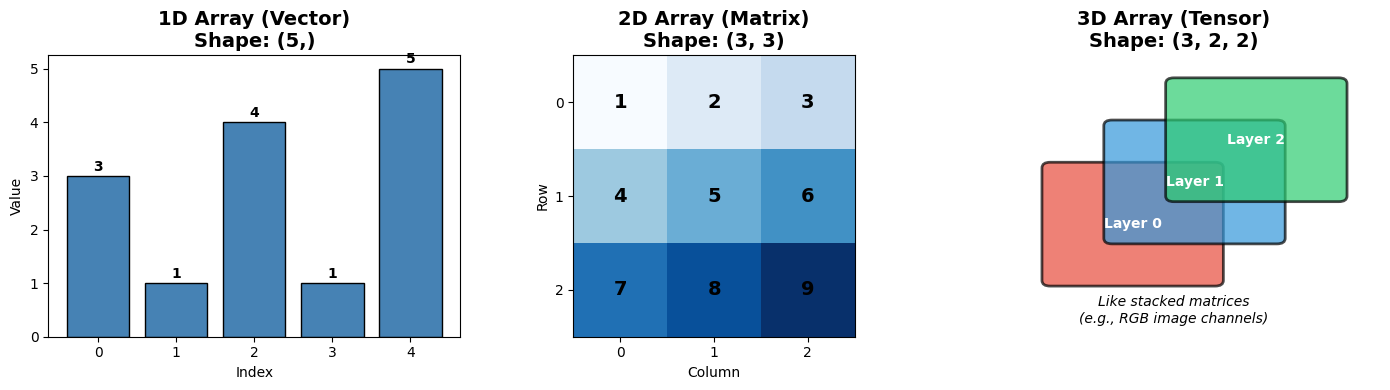

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Visualize array dimensions
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# 1D - Vector
ax1 = axes[0]
vector = np.array([3, 1, 4, 1, 5])
ax1.bar(range(len(vector)), vector, color='steelblue', edgecolor='black')
ax1.set_title('1D Array (Vector)\nShape: (5,)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')
for i, v in enumerate(vector):
    ax1.text(i, v + 0.1, str(v), ha='center', fontweight='bold')

# 2D - Matrix
ax2 = axes[1]
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
im = ax2.imshow(matrix, cmap='Blues')
ax2.set_title('2D Array (Matrix)\nShape: (3, 3)', fontsize=14, fontweight='bold')
for i in range(3):
    for j in range(3):
        ax2.text(j, i, matrix[i, j], ha='center', va='center', fontsize=14, fontweight='bold')
ax2.set_xticks(range(3))
ax2.set_yticks(range(3))
ax2.set_xlabel('Column')
ax2.set_ylabel('Row')

# 3D - Tensor visualization
ax3 = axes[2]
ax3.axis('off')
ax3.set_title('3D Array (Tensor)\nShape: (3, 2, 2)', fontsize=14, fontweight='bold')

# Draw stacked matrices
colors = ['#e74c3c', '#3498db', '#2ecc71']
for idx, (color, offset) in enumerate(zip(colors, [0, 0.15, 0.3])):
    rect = FancyBboxPatch((0.2 + offset, 0.2 + offset), 0.4, 0.4,
                          boxstyle="round,pad=0.02",
                          facecolor=color, alpha=0.7, edgecolor='black', linewidth=2)
    ax3.add_patch(rect)
    ax3.text(0.4 + offset, 0.4 + offset, f'Layer {idx}', ha='center', va='center',
             fontsize=10, fontweight='bold', color='white')

ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.text(0.5, 0.05, 'Like stacked matrices\n(e.g., RGB image channels)',
         ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

## 1.2 Special Array Creation Functions

These are used constantly in deep learning for initialization!

In [ ]:
import numpy as np
# Zeros - used for bias initialization
zeros = np.zeros((3, 4))
print("Zeros (3x4):")
print(zeros)
print("Deep Learning Use: Initialize biases to zero\n")

# Ones - used for masks, scaling
ones = np.ones((2, 3))
print("Ones (2x3):")
print(ones)
print("Deep Learning Use: Attention masks, gradient scaling\n")

# Identity matrix - used in residual connections
identity = np.eye(4)
print("Identity (4x4):")
print(identity)
print("Deep Learning Use: Skip connections (ResNet), orthogonal initialization")

Zeros (3x4):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Deep Learning Use: Initialize biases to zero

Ones (2x3):
[[1. 1. 1.]
 [1. 1. 1.]]
Deep Learning Use: Attention masks, gradient scaling

Identity (4x4):
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Deep Learning Use: Skip connections (ResNet), orthogonal initialization


In [ ]:
import numpy as np
# Ranges - useful for creating sequences
print("np.arange(0, 10, 2):")
print(np.arange(0, 10, 2))  # start, stop, step
print("Deep Learning Use: Creating position encodings\n")

print("np.linspace(0, 1, 5):")
print(np.linspace(0, 1, 5))  # start, stop, num_points
print("Deep Learning Use: Learning rate schedules, interpolation")

np.arange(0, 10, 2):
[0 2 4 6 8]
Deep Learning Use: Creating position encodings

np.linspace(0, 1, 5):
[0.   0.25 0.5  0.75 1.  ]
Deep Learning Use: Learning rate schedules, interpolation


## 1.3 Data Types (dtypes)

**Critical for Deep Learning**: The dtype affects memory usage, speed, and precision!

In [ ]:
import numpy as np
# Different data types
int_array = np.array([1, 2, 3], dtype=np.int32)
float32_array = np.array([1, 2, 3], dtype=np.float32)
float64_array = np.array([1, 2, 3], dtype=np.float64)

print(f"int32:   {int_array}, dtype={int_array.dtype}, bytes per element={int_array.itemsize}")
print(f"float32: {float32_array}, dtype={float32_array.dtype}, bytes per element={float32_array.itemsize}")
print(f"float64: {float64_array}, dtype={float64_array.dtype}, bytes per element={float64_array.itemsize}")

int32:   [1 2 3], dtype=int32, bytes per element=4
float32: [1. 2. 3.], dtype=float32, bytes per element=4
float64: [1. 2. 3.], dtype=float64, bytes per element=8


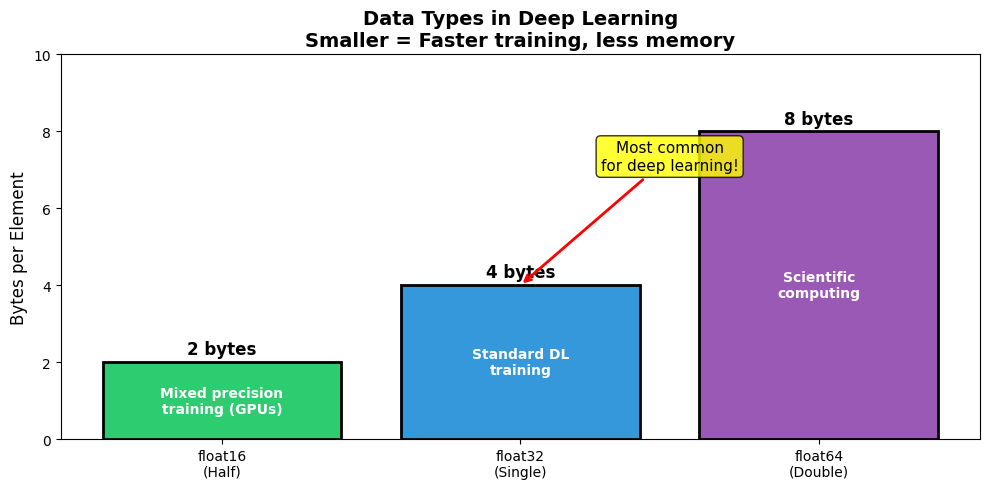

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize dtype memory usage for deep learning
fig, ax = plt.subplots(figsize=(10, 5))

dtypes = ['float16\n(Half)', 'float32\n(Single)', 'float64\n(Double)']
bytes_per = [2, 4, 8]
colors = ['#2ecc71', '#3498db', '#9b59b6']
uses = ['Mixed precision\ntraining (GPUs)', 'Standard DL\ntraining', 'Scientific\ncomputing']

bars = ax.bar(dtypes, bytes_per, color=colors, edgecolor='black', linewidth=2)

for bar, use in zip(bars, uses):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.2,
            f'{int(height)} bytes', ha='center', fontweight='bold', fontsize=12)
    ax.text(bar.get_x() + bar.get_width()/2., height/2,
            use, ha='center', va='center', fontsize=10, color='white', fontweight='bold')

ax.set_ylabel('Bytes per Element', fontsize=12)
ax.set_title('Data Types in Deep Learning\nSmaller = Faster training, less memory', fontsize=14, fontweight='bold')
ax.set_ylim(0, 10)

# Add annotation
ax.annotate('Most common\nfor deep learning!', xy=(1, 4), xytext=(1.5, 7),
            fontsize=11, ha='center',
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.show()

### Deep Learning Connection: Tensor Shapes in Neural Networks

Understanding shapes is **CRUCIAL**. Let's see real examples:

In [ ]:
import numpy as np
# Real deep learning tensor shapes
print("Common Tensor Shapes in Deep Learning:")
print("=" * 50)

# Batch of grayscale images (like MNIST)
mnist_batch = np.zeros((32, 28, 28))  # 32 images, 28x28 pixels
print(f"\nMNIST batch shape: {mnist_batch.shape}")
print("  -> (batch_size, height, width)")

# Batch of color images (like CIFAR-10)
cifar_batch = np.zeros((32, 32, 32, 3))  # 32 images, 32x32 pixels, RGB
print(f"\nCIFAR-10 batch shape: {cifar_batch.shape}")
print("  -> (batch_size, height, width, channels)")

# Weight matrix for fully connected layer
weights = np.zeros((784, 256))  # 784 inputs -> 256 outputs
print(f"\nDense layer weights shape: {weights.shape}")
print("  -> (input_features, output_features)")

# Sequence data (like text)
text_batch = np.zeros((16, 100, 512))  # 16 sequences, length 100, embedding dim 512
print(f"\nText batch shape: {text_batch.shape}")
print("  -> (batch_size, sequence_length, embedding_dim)")

Common Tensor Shapes in Deep Learning:

MNIST batch shape: (32, 28, 28)
  -> (batch_size, height, width)

CIFAR-10 batch shape: (32, 32, 32, 3)
  -> (batch_size, height, width, channels)

Dense layer weights shape: (784, 256)
  -> (input_features, output_features)

Text batch shape: (16, 100, 512)
  -> (batch_size, sequence_length, embedding_dim)


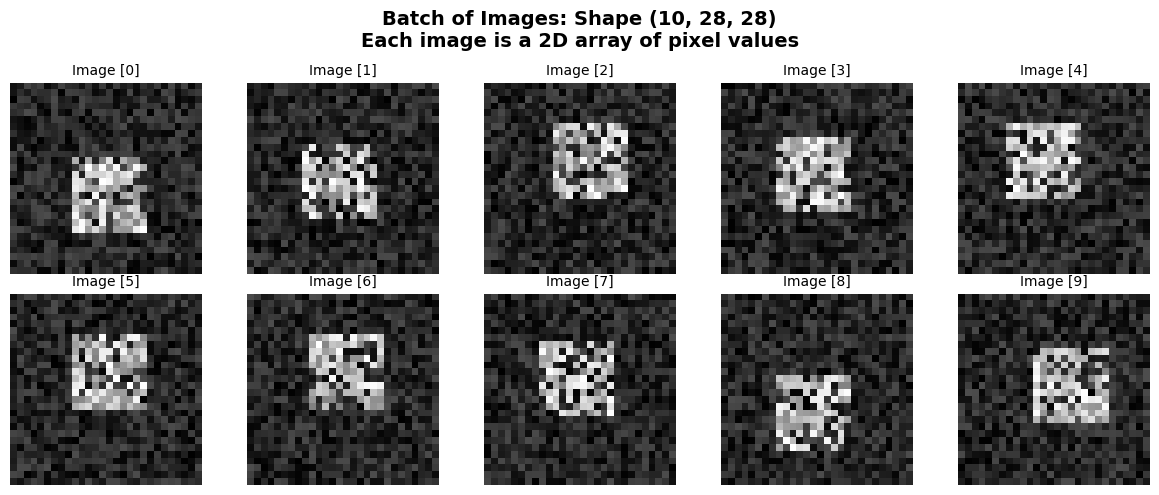


Batch shape: (10, 28, 28)
Single image shape: (28, 28)
Total pixels in batch: 7,840


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize a real MNIST-like image batch
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Batch of Images: Shape (10, 28, 28)\nEach image is a 2D array of pixel values',
             fontsize=14, fontweight='bold')

# Create fake digit-like patterns
batch = np.random.rand(10, 28, 28) * 0.3  # background noise
for i in range(10):
    # Add some structure to make them look digit-like
    center_x, center_y = 14 + np.random.randint(-3, 4), 14 + np.random.randint(-3, 4)
    for dx in range(-5, 6):
        for dy in range(-5, 6):
            if np.random.rand() > 0.3:
                x, y = center_x + dx, center_y + dy
                if 0 <= x < 28 and 0 <= y < 28:
                    batch[i, y, x] = np.random.rand() * 0.5 + 0.5

for idx, ax in enumerate(axes.flat):
    ax.imshow(batch[idx], cmap='gray')
    ax.set_title(f'Image [{idx}]', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

print(f"\nBatch shape: {batch.shape}")
print(f"Single image shape: {batch[0].shape}")
print(f"Total pixels in batch: {batch.size:,}")

## Quick Check: Understanding Shapes

Test your understanding!

In [ ]:
import numpy as np
# Exercise: Predict the shapes before running!
a = np.zeros((3, 4, 5))
b = np.ones((2,))
c = np.eye(3)

print("Predict these shapes, then check:")
print(f"a.shape = {a.shape}  <- 3D tensor with ? elements")
print(f"b.shape = {b.shape}  <- 1D vector")
print(f"c.shape = {c.shape}  <- 2D identity matrix")
print(f"\nTotal elements: a={a.size}, b={b.size}, c={c.size}")

Predict these shapes, then check:
a.shape = (3, 4, 5)  <- 3D tensor with ? elements
b.shape = (2,)  <- 1D vector
c.shape = (3, 3)  <- 2D identity matrix

Total elements: a=60, b=2, c=9


---

# Section 2: Indexing and Slicing

## Why It Matters for Deep Learning

- **Batch selection**: Get specific samples from your dataset
- **Feature extraction**: Select specific channels or dimensions
- **Train/test splits**: Divide data for training and validation
- **Attention mechanisms**: Select relevant parts of sequences

## 2.1 Basic Indexing (1D Arrays)

In [ ]:
import numpy as np
arr = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
print("Array:", arr)
print(f"Length: {len(arr)}")
print()

# Positive indexing (from start)
print(f"arr[0] = {arr[0]}   <- First element")
print(f"arr[3] = {arr[3]}   <- Fourth element")
print()

# Negative indexing (from end)
print(f"arr[-1] = {arr[-1]}  <- Last element")
print(f"arr[-2] = {arr[-2]}  <- Second to last")

Array: [10 20 30 40 50 60 70 80 90]
Length: 9

arr[0] = 10   <- First element
arr[3] = 40   <- Fourth element

arr[-1] = 90  <- Last element
arr[-2] = 80  <- Second to last


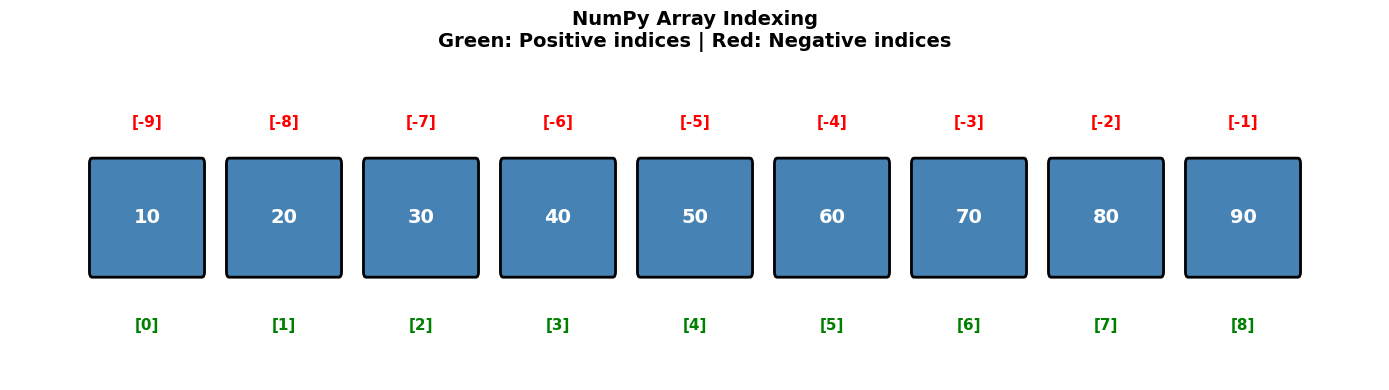

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Visualize indexing
fig, ax = plt.subplots(figsize=(14, 4))

arr = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
x_pos = np.arange(len(arr))

# Draw boxes for each element
for i, (x, val) in enumerate(zip(x_pos, arr)):
    rect = FancyBboxPatch((x - 0.4, 0.3), 0.8, 0.4,
                          boxstyle="round,pad=0.02",
                          facecolor='steelblue', edgecolor='black', linewidth=2)
    ax.add_patch(rect)
    ax.text(x, 0.5, str(val), ha='center', va='center', fontsize=14, fontweight='bold', color='white')

    # Positive index
    ax.text(x, 0.1, f'[{i}]', ha='center', va='center', fontsize=11, color='green', fontweight='bold')

    # Negative index
    ax.text(x, 0.85, f'[{i - len(arr)}]', ha='center', va='center', fontsize=11, color='red', fontweight='bold')

ax.set_xlim(-1, len(arr))
ax.set_ylim(-0.1, 1.1)
ax.axis('off')
ax.set_title('NumPy Array Indexing\nGreen: Positive indices | Red: Negative indices', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 2.2 Slicing: `start:stop:step`

The slice syntax `[start:stop:step]` is incredibly powerful!

In [ ]:
import numpy as np
arr = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
print("Original:", arr)
print()

# Basic slicing
print(f"arr[2:5]   = {arr[2:5]}      <- Elements 2,3,4 (stop is exclusive!)")
print(f"arr[:4]    = {arr[:4]}    <- First 4 elements")
print(f"arr[5:]    = {arr[5:]}    <- From index 5 to end")
print(f"arr[::2]   = {arr[::2]}   <- Every 2nd element")
print(f"arr[::-1]  = {arr[::-1]}  <- Reversed!")

Original: [10 20 30 40 50 60 70 80 90]

arr[2:5]   = [30 40 50]      <- Elements 2,3,4 (stop is exclusive!)
arr[:4]    = [10 20 30 40]    <- First 4 elements
arr[5:]    = [60 70 80 90]    <- From index 5 to end
arr[::2]   = [10 30 50 70 90]   <- Every 2nd element
arr[::-1]  = [90 80 70 60 50 40 30 20 10]  <- Reversed!


In [ ]:
import numpy as np
# Deep Learning Example: Train/Validation Split
print("Deep Learning Use Case: Train/Validation Split")
print("=" * 50)

# Simulate a dataset
dataset = np.arange(100)  # 100 samples
np.random.shuffle(dataset)  # Shuffle!

# 80/20 split
split_idx = int(0.8 * len(dataset))
train_data = dataset[:split_idx]
val_data = dataset[split_idx:]

print(f"Total samples: {len(dataset)}")
print(f"Training samples: {len(train_data)} (indices [:80])")
print(f"Validation samples: {len(val_data)} (indices [80:])")
print(f"\nFirst 10 training samples: {train_data[:10]}")

Deep Learning Use Case: Train/Validation Split
Total samples: 100
Training samples: 80 (indices [:80])
Validation samples: 20 (indices [80:])

First 10 training samples: [47 23 85  9 44 87 81 19 27 99]


## 2.3 Multi-dimensional Indexing

This is where it gets powerful for deep learning!

In [ ]:
import numpy as np
# Create a 2D array (matrix)
matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12]])

print("Matrix (3x4):")
print(matrix)
print(f"Shape: {matrix.shape}")
print()

# Accessing elements: [row, column]
print(f"matrix[0, 0] = {matrix[0, 0]}   <- Top-left")
print(f"matrix[1, 2] = {matrix[1, 2]}   <- Row 1, Column 2")
print(f"matrix[-1, -1] = {matrix[-1, -1]} <- Bottom-right")

Matrix (3x4):
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Shape: (3, 4)

matrix[0, 0] = 1   <- Top-left
matrix[1, 2] = 7   <- Row 1, Column 2
matrix[-1, -1] = 12 <- Bottom-right


In [ ]:
import numpy as np
# Slicing rows and columns
print("Slicing Examples:")
print(f"matrix[0, :]   = {matrix[0, :]}      <- First row (all columns)")
print(f"matrix[:, 0]   = {matrix[:, 0]}          <- First column (all rows)")
print(f"matrix[0:2, 1:3] =\n{matrix[0:2, 1:3]}    <- Submatrix")

Slicing Examples:
matrix[0, :]   = [1 2 3 4]      <- First row (all columns)
matrix[:, 0]   = [1 5 9]          <- First column (all rows)
matrix[0:2, 1:3] =
[[2 3]
 [6 7]]    <- Submatrix


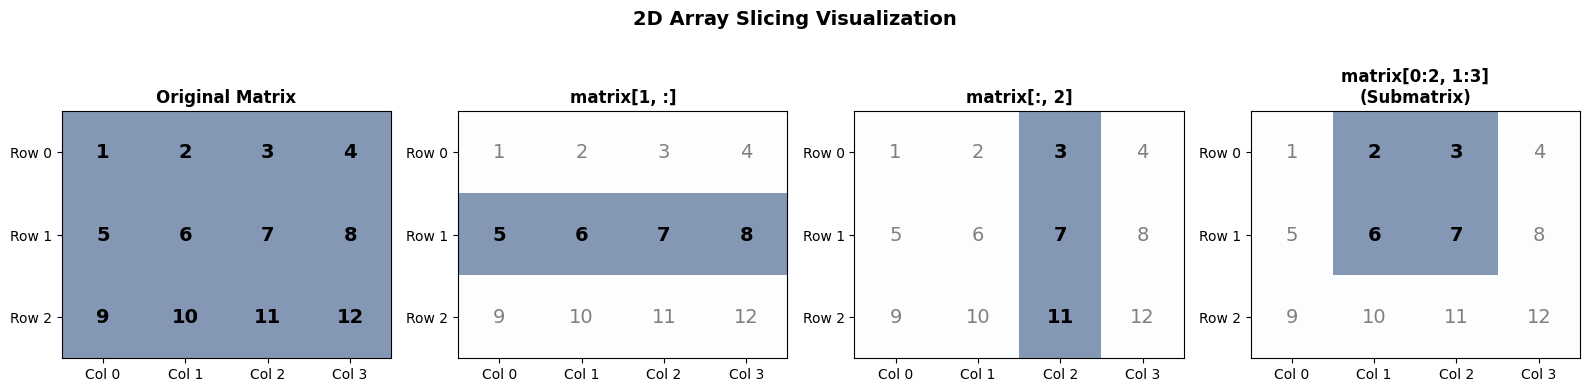

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize 2D slicing
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

matrix = np.arange(1, 13).reshape(3, 4)

titles = ['Original Matrix', 'matrix[1, :]', 'matrix[:, 2]', 'matrix[0:2, 1:3]\n(Submatrix)']
data = [matrix, matrix[1:2, :], matrix[:, 2:3], matrix[0:2, 1:3]]
highlights = [None, (1, slice(None)), (slice(None), 2), (slice(0,2), slice(1,3))]

for ax, title, d, h in zip(axes, titles, data, highlights):
    # Show full matrix with highlight
    display_matrix = np.zeros_like(matrix, dtype=float)
    if h is None:
        display_matrix = matrix.astype(float)
        mask = np.ones_like(matrix)
    else:
        mask = np.zeros_like(matrix)
        mask[h] = 1
        display_matrix = matrix * mask

    ax.imshow(mask, cmap='Blues', alpha=0.5, vmin=0, vmax=1)

    for i in range(3):
        for j in range(4):
            color = 'black' if mask[i, j] else 'gray'
            weight = 'bold' if mask[i, j] else 'normal'
            ax.text(j, i, str(matrix[i, j]), ha='center', va='center',
                   fontsize=14, color=color, fontweight=weight)

    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xticks(range(4))
    ax.set_yticks(range(3))
    ax.set_xticklabels(['Col 0', 'Col 1', 'Col 2', 'Col 3'])
    ax.set_yticklabels(['Row 0', 'Row 1', 'Row 2'])

plt.suptitle('2D Array Slicing Visualization', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Deep Learning Connection: Batch Processing

In [ ]:
import numpy as np
# Simulating batch processing in neural networks
print("Deep Learning Use Case: Mini-Batch Selection")
print("=" * 50)

# Create fake image dataset: 1000 images, 28x28 pixels
dataset = np.random.rand(1000, 28, 28)
labels = np.random.randint(0, 10, 1000)  # 10 classes

print(f"Dataset shape: {dataset.shape}")
print(f"Labels shape: {labels.shape}")

# Get a mini-batch of 32 samples
batch_size = 32
batch_idx = 0

start = batch_idx * batch_size
end = start + batch_size

batch_images = dataset[start:end]  # Shape: (32, 28, 28)
batch_labels = labels[start:end]   # Shape: (32,)

print(f"\nBatch {batch_idx}:")
print(f"  Images shape: {batch_images.shape}")
print(f"  Labels shape: {batch_labels.shape}")
print(f"  Labels: {batch_labels[:10]}... (first 10)")

Deep Learning Use Case: Mini-Batch Selection
Dataset shape: (1000, 28, 28)
Labels shape: (1000,)

Batch 0:
  Images shape: (32, 28, 28)
  Labels shape: (32,)
  Labels: [3 3 6 0 7 8 0 4 5 0]... (first 10)


## 2.4 Boolean Indexing (Masking)

Select elements based on conditions - super useful for filtering data!

In [ ]:
import numpy as np
arr = np.array([1, -2, 3, -4, 5, -6, 7, -8, 9])
print("Array:", arr)
print()

# Create boolean mask
mask = arr > 0
print(f"Mask (arr > 0): {mask}")
print(f"Positive values: {arr[mask]}")
print()

# Multiple conditions
mask2 = (arr > 0) & (arr < 6)  # Note: use & not 'and'
print(f"Values between 0 and 6: {arr[mask2]}")

Array: [ 1 -2  3 -4  5 -6  7 -8  9]

Mask (arr > 0): [ True False  True False  True False  True False  True]
Positive values: [1 3 5 7 9]

Values between 0 and 6: [1 3 5]


Deep Learning Use Case: ReLU Activation
Before ReLU: [-2.5  1.2 -0.5  3.1 -1.8  0.7 -0.1  2.4]
After ReLU:  [0.  1.2 0.  3.1 0.  0.7 0.  2.4]


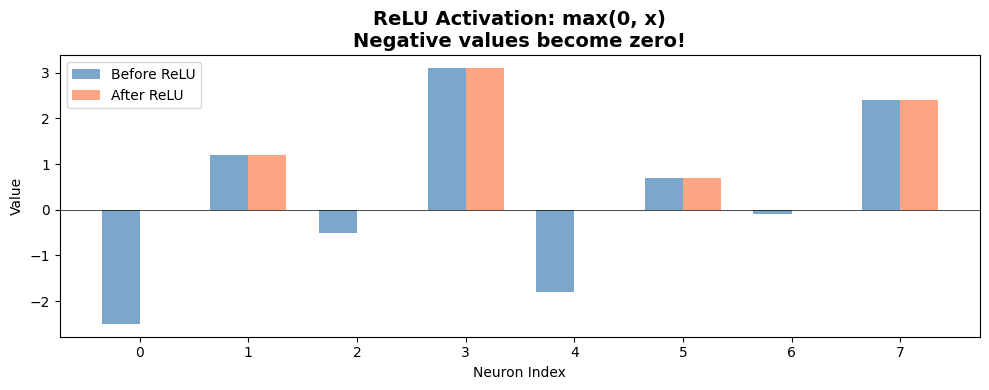

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Deep Learning Example: ReLU activation using boolean indexing!
print("Deep Learning Use Case: ReLU Activation")
print("=" * 50)

# Simulate layer output (before activation)
z = np.array([-2.5, 1.2, -0.5, 3.1, -1.8, 0.7, -0.1, 2.4])
print(f"Before ReLU: {z}")

# ReLU: max(0, x) - implemented with boolean indexing
relu_output = z.copy()
relu_output[relu_output < 0] = 0  # Set negatives to zero
print(f"After ReLU:  {relu_output}")

# Visualize
fig, ax = plt.subplots(figsize=(10, 4))
x = np.arange(len(z))
width = 0.35

bars1 = ax.bar(x - width/2, z, width, label='Before ReLU', color='steelblue', alpha=0.7)
bars2 = ax.bar(x + width/2, relu_output, width, label='After ReLU', color='coral', alpha=0.7)

ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_xlabel('Neuron Index')
ax.set_ylabel('Value')
ax.set_title('ReLU Activation: max(0, x)\nNegative values become zero!', fontsize=14, fontweight='bold')
ax.legend()
ax.set_xticks(x)

plt.tight_layout()
plt.show()

## 2.5 Fancy Indexing

Use arrays of indices to select specific elements.

In [ ]:
import numpy as np
arr = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
print("Array:", arr)

# Select specific indices
indices = np.array([0, 2, 5, 8])
print(f"Indices: {indices}")
print(f"Selected: {arr[indices]}")

Array: [10 20 30 40 50 60 70 80 90]
Indices: [0 2 5 8]
Selected: [10 30 60 90]


In [ ]:
import numpy as np
# Deep Learning Example: Embedding lookup
print("Deep Learning Use Case: Word Embedding Lookup")
print("=" * 50)

# Embedding matrix: 1000 words, 128-dimensional embeddings
vocab_size = 1000
embedding_dim = 128
embedding_matrix = np.random.randn(vocab_size, embedding_dim)

print(f"Embedding matrix shape: {embedding_matrix.shape}")

# A sentence as word indices
sentence = np.array([42, 156, 789, 23, 501])  # 5 word indices
print(f"Sentence (word indices): {sentence}")

# Look up embeddings for the sentence
sentence_embeddings = embedding_matrix[sentence]  # Fancy indexing!
print(f"Sentence embeddings shape: {sentence_embeddings.shape}")
print("  -> (num_words, embedding_dim)")

Deep Learning Use Case: Word Embedding Lookup
Embedding matrix shape: (1000, 128)
Sentence (word indices): [ 42 156 789  23 501]
Sentence embeddings shape: (5, 128)
  -> (num_words, embedding_dim)


---

# Section 3: Element-wise Operations

## The Foundation of Neural Network Computation

**Element-wise operations** apply the same operation to every element in an array. This is how:
- Activation functions work (apply sigmoid/ReLU to every neuron)
- Normalization works (subtract mean, divide by std from every value)
- Loss gradients are computed

Let's master these operations!